In [4]:
from pathlib import Path
import math
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Project paths
ROOT = Path.cwd().parents[0]   # notebooks → repo root
DATA = ROOT / "data"
SRC = ROOT / "src"

print("ROOT:", ROOT)
print("DATA:", DATA)


ROOT: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb
DATA: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\data


In [5]:
def read_fasta(filepath):
    sequences = []
    with open(filepath) as f:
        seq = ""
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith(">"):
                if seq:
                    sequences.append(seq)
                    seq = ""
            else:
                seq += line
        if seq:
            sequences.append(seq)
    return sequences

fasta_path = DATA / "nfkb_example.fasta"
seqs = read_fasta(fasta_path)
print(f"Loaded {len(seqs)} sequences")
seqs[:3]  # preview first 3 sequences


Loaded 12 sequences


['GGGAACTTCC', 'GGGGATTTCC', 'GGGAACCTCC']

In [ ]:
import pandas as pd
from collections import Counter
import math

L = len(seqs[0])
alphabet = ["A","C","G","T"]

def column_entropy(col):
    counts = Counter(col)
    total = len(col)
    ent = 0.0
    for c in counts.values():
        p = c/total
        ent -= p*math.log2(p)
    return ent

rows = []
for i in range(L):
    col = [s[i] for s in seqs]
    counts = Counter(col)
    freqs = {b: counts.get(b,0)/len(seqs) for b in alphabet}
    rows.append({"position": i+1, "H": column_entropy(col), **freqs})

df = pd.DataFrame(rows)
df


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(df["position"], df["H"])
plt.xlabel("Position")
plt.ylabel("Entropy (bits)")
plt.title("NF-κB motif per-column entropy")
plt.show()


In [1]:
print("hello")

hello


In [2]:
lengths = [len(s) for s in seqs]
print("Sequence lengths:", lengths)
print("All equal length?", len(set(lengths)) == 1)

NameError: name 'seqs' is not defined

In [6]:
valid = set("ACGT")
bad_positions = []
bad_seqs = []
for i, s in enumerate(seqs, start=1):
    if any(ch not in valid for ch in s):
        bad_seqs.append((i, s))
    if s != s.upper():
        bad_positions.append(i)

print("Non-ACGT sequences found:", len(bad_seqs))
print("Any lowercase sequences?", len(bad_positions) > 0)


Non-ACGT sequences found: 0
Any lowercase sequences? False


In [7]:
from collections import Counter
import math

def column_entropy(column):
    counts = Counter(column)
    total = len(column)
    ent = 0.0
    for c in counts.values():
        p = c / total
        ent -= p * math.log2(p)
    return ent

def motif_entropy(sequences):
    if not sequences:
        return 0.0
    L = len(sequences[0])
    return sum(column_entropy([s[i] for s in sequences]) for i in range(L))

total_H = motif_entropy(seqs)
print("Total motif entropy:", total_H)


Total motif entropy: 3.654226493126826


In [8]:
import pandas as pd

L = len(seqs[0])
alphabet = ["A", "C", "G", "T"]

rows = []
for i in range(L):
    col = [s[i] for s in seqs]
    counts = Counter(col)
    freqs = {b: counts.get(b, 0) / len(seqs) for b in alphabet}
    H = column_entropy(col)
    rows.append({"position": i+1, "H": H, **freqs})

df = pd.DataFrame(rows)
df


,position,H,A,C,G,T
0,1,0.000000,0.000000,0.000000,1.000000,0.000000
1,2,0.000000,0.000000,0.000000,1.000000,0.000000
2,3,0.000000,0.000000,0.000000,1.000000,0.000000
3,4,0.979869,0.583333,0.000000,0.416667,0.000000
4,5,0.413817,0.916667,0.000000,0.083333,0.000000
5,6,1.280672,0.000000,0.583333,0.083333,0.333333
6,7,0.979869,0.000000,0.416667,0.000000,0.583333
7,8,0.000000,0.000000,0.000000,0.000000,1.000000
8,9,0.000000,0.000000,1.000000,0.000000,0.000000
9,10,0.000000,0.000000,1.000000,0.000000,0.000000


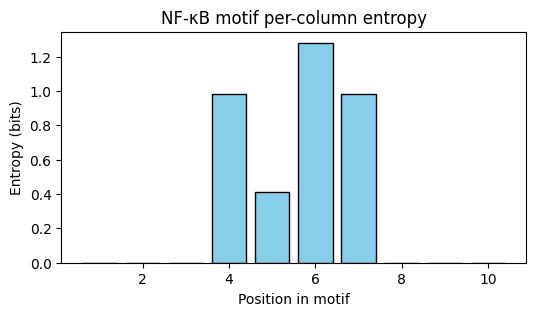

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(df["position"], df["H"], color="skyblue", edgecolor="black")
plt.xlabel("Position in motif")
plt.ylabel("Entropy (bits)")
plt.title("NF-κB motif per-column entropy")
plt.show()


**Figure 1. NF-κB motif per-column entropy.**  
Bars show information content across 12 example binding sites. Lower entropy values (near 0) correspond to highly conserved positions, while higher entropy indicates variable bases. This highlights conserved “GGG” at the start and “CC” at the end, consistent with the NF-κB consensus motif (GGGRNNYYCC).


# Motif Entropy Analysis: NF-κB Example

This notebook shows a complete, reproducible workflow:
1. **Data loading** — read FASTA sequences
2. **Validation** — check sequence length, alphabet, and formatting
3. **Computation** — calculate total motif entropy and per-column entropy
4. **Visualization** — plot per-column entropy and add a short caption


## 1. Data Loading


## 2. Dataset Validation


## 3. Computation


## 4. Visualization


## 5. Challenges and Fixes

During development, several issues came up:

- **IndentationError**: The first attempt at writing `motif_entropy.py` had hidden spaces at the top of the file.  
  *Fix*: Rewrote the file carefully in Notepad with no extra spaces at line 1.

- **FASTA not loading (0.0 entropy)**: At one point the script returned `0.0`.  
  *Fix*: This revealed the parser only loaded 1 sequence because the FASTA was malformed. Rebuilt the FASTA with proper headers (`>seqX`) for each line.

- **Notebook variables lost after restart**: When re-opening Jupyter, variables like `DATA` and `seqs` were missing.  
  *Fix*: Re-ran the path setup and FASTA-loading cells in order. Added clear section headers so re-runs are straightforward.

- **Save error (“Failed to fetch”)**: Jupyter initially could not save the notebook.  
  *Fix*: Restarted Jupyter cleanly from Anaconda Prompt, which resolved the issue.

These challenges document a realistic debugging process and show how reproducibility and structure help overcome common errors.
